**DATA PREPARATION**



Tahap 1: Exploratory Data Analysis
1. Lakukan data preparation, seperti mengimport libraries dan variabel data
   



In [7]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Import data
house = pd.read_csv('/content/train_house.csv')
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [13]:
# Mengatur pandas untuk menampilkan semua kolom
pd.set_option('display.max_rows', None)

# Menampilkan semua kolom dan tipe datanya
column_info = pd.DataFrame({
    'Column Name': house.columns,
    'Data Type': house.dtypes.values
})
print(column_info)




      Column Name Data Type
0              Id     int64
1      MSSubClass     int64
2        MSZoning    object
3     LotFrontage   float64
4         LotArea     int64
5          Street    object
6           Alley    object
7        LotShape    object
8     LandContour    object
9       Utilities    object
10      LotConfig    object
11      LandSlope    object
12   Neighborhood    object
13     Condition1    object
14     Condition2    object
15       BldgType    object
16     HouseStyle    object
17    OverallQual     int64
18    OverallCond     int64
19      YearBuilt     int64
20   YearRemodAdd     int64
21      RoofStyle    object
22       RoofMatl    object
23    Exterior1st    object
24    Exterior2nd    object
25     MasVnrType    object
26     MasVnrArea   float64
27      ExterQual    object
28      ExterCond    object
29     Foundation    object
30       BsmtQual    object
31       BsmtCond    object
32   BsmtExposure    object
33   BsmtFinType1    object
34     BsmtFinSF1   

2.Terapkan drop variabel NaN untuk mengeliminasi data NaN

In [16]:
# Drop variabel NaN
# Mengecek jumlah nilai NaN pada setiap kolom
nan_per_column = house.isna().sum()
print("Jumlah nilai NaN per kolom:\n")
print(nan_per_column[nan_per_column > 0])  # Hanya menampilkan kolom yang memiliki NaN

# Menghitung total baris yang memiliki setidaknya satu nilai NaN
rows_with_nan = house.isna().any(axis=1).sum()
print(f"\nTotal baris dengan setidaknya satu nilai NaN: {rows_with_nan}")



Jumlah nilai NaN per kolom:

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Total baris dengan setidaknya satu nilai NaN: 1460


In [17]:
# Menampilkan kolom yang memiliki nilai NaN
columns_with_nan = nan_per_column[nan_per_column > 0].index.tolist()

print("Kolom-kolom yang memiliki nilai NaN:")
print(columns_with_nan)


Kolom-kolom yang memiliki nilai NaN:
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [18]:
# Daftar kolom yang memiliki nilai NaN
columns_with_nan = ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
                    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                    'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
                    'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
                    'Fence', 'MiscFeature']

# Menghapus kolom-kolom dengan nilai NaN
house_cleaned = house.drop(columns=columns_with_nan)

# Menampilkan informasi dataset setelah penghapusan kolom
print("Dataset setelah menghapus kolom dengan nilai NaN:")
house_cleaned.info()


Dataset setelah menghapus kolom dengan nilai NaN:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 n

3.Pisahkan data numerikal dan kategorikal sebelum masuk ke tahap visualisasi

In [20]:
# Memisahkan data menjadi numerikal & kategorikal
# Memisahkan data numerikal
numerical_data = house_cleaned.select_dtypes(include=['int64', 'float64'])

# Memisahkan data kategorikal
categorical_data = house_cleaned.select_dtypes(include=['object'])

# Membuat tabel dengan pandas untuk hasil yang lebih rapi
numerical_table = pd.DataFrame(numerical_data)
categorical_table = pd.DataFrame(categorical_data)

# Menampilkan tabel
print("Data Numerikal:")
display(numerical_table.head())  # Untuk menampilkan DataFrame dengan lebih rapi

print("\nData Kategorikal:")
display(categorical_table.head())  # Untuk menampilkan DataFrame dengan lebih rapi

Data Numerikal:


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000



Data Kategorikal:


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


Tahap 2: 1D Visualization

4.Buatlah visualisasi bar chart dan jelaskan analisis dari variabel kategorikal berikut:

- Utilities
- HouseStyle
- ExterQual

In [24]:
# Menampilkan 10 baris pertama dari ketiga kolom
top_10_values = categorical_data[['Utilities', 'HouseStyle', 'ExterQual']].head(10)
top_10_values


,Utilities,HouseStyle,ExterQual
0,AllPub,2Story,Gd
1,AllPub,1Story,TA
2,AllPub,2Story,Gd
3,AllPub,2Story,TA
4,AllPub,2Story,Gd
5,AllPub,1.5Fin,TA
6,AllPub,1Story,Gd
7,AllPub,2Story,TA
8,AllPub,1.5Fin,TA
9,AllPub,1.5Unf,TA


In [28]:
# Menampilkan nilai unik untuk setiap kolom kategorikal
unique_utilities = categorical_data['Utilities'].unique()
unique_housestyle = categorical_data['HouseStyle'].unique()
unique_exterqual = categorical_data['ExterQual'].unique()

print("Nilai unik pada kolom 'Utilities':")
print(unique_utilities)

print("\nNilai unik pada kolom 'HouseStyle':")
print(unique_housestyle)

print("\nNilai unik pada kolom 'ExterQual':")
print(unique_exterqual)


Nilai unik pada kolom 'Utilities':
['AllPub' 'NoSeWa']

Nilai unik pada kolom 'HouseStyle':
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

Nilai unik pada kolom 'ExterQual':
['Gd' 'TA' 'Ex' 'Fa']


1. Kolom: Utilities

Nilai Unik:

AllPub: Ini menunjukkan bahwa properti ini terhubung ke semua layanan umum yang biasa tersedia (air, listrik, gas, dan saluran pembuangan).

NoSeWa: Ini berarti properti ini tidak terhubung ke saluran air atau saluran pembuangan umum (mungkin menggunakan sumur dan septik tank).
Penjelasan:

Kolom ini menunjukkan jenis fasilitas atau utilities yang tersedia di properti. Properti yang terhubung ke fasilitas umum seperti AllPub cenderung lebih berharga karena akses lebih mudah ke air, listrik, dan saluran pembuangan.
Properti yang menggunakan sistem non-umum (seperti NoSeWa) mungkin berada di area yang lebih terpencil atau memiliki infrastruktur yang kurang berkembang, yang bisa mempengaruhi harga jual rumah.


2. Kolom: HouseStyle


Nilai Unik:

2Story: Rumah dengan dua lantai.


1Story: Rumah dengan satu lantai.

1.5Fin: Rumah dengan satu setengah lantai, di mana setengah lantai kedua sudah selesai dikerjakan dan bisa digunakan.

1.5Unf: Rumah dengan satu setengah lantai, tetapi lantai kedua belum selesai dan tidak dapat digunakan.

SFoyer: Rumah dengan dua lantai, tetapi dengan area foyer yang lebih tinggi di lantai pertama.

SLvl: Rumah dengan lantai bertingkat, artinya ruang lantai atas dan bawah berada pada tingkat yang berbeda.

2.5Unf: Rumah dua setengah lantai yang belum selesai (belum terbangun penuh).

2.5Fin: Rumah dua setengah lantai yang sudah selesai dibangun.
Penjelasan:

Kolom HouseStyle memberikan gambaran tentang desain dan struktur rumah. Beberapa gaya rumah, seperti 2Story, lebih populer karena ruangannya lebih luas dan memungkinkan pemisahan antara ruang tidur dan ruang keluarga.
Rumah dengan 1Story biasanya lebih disukai oleh orang yang lebih tua atau mereka yang membutuhkan akses mudah ke seluruh bagian rumah tanpa harus menaiki tangga.

Rumah dengan gaya setengah lantai (1.5Fin, 1.5Unf) cenderung lebih unik dan bisa memberikan karakter pada properti, namun ini mungkin mempengaruhi harga berdasarkan kualitas dan penyelesaian bangunan.

3. Kolom: ExterQual

Nilai Unik:

Gd: Kualitas eksterior rumah sangat baik (Good).

TA: Kualitas eksterior rumah sedang (Typical/Average).

Ex: Kualitas eksterior rumah luar biasa (Excellent).

Fa: Kualitas eksterior rumah buruk (Fair).

Penjelasan:

Kolom ExterQual menunjukkan kualitas bahan dan kondisi eksterior rumah (seperti dinding, cat, dan struktur luar lainnya). Kualitas eksterior berpengaruh pada daya tarik pertama (curb appeal) dan dapat sangat memengaruhi harga rumah.
Properti dengan kualitas eksterior lebih baik (Ex dan Gd) biasanya dihargai lebih tinggi karena lebih menarik dan mungkin memerlukan biaya perawatan yang lebih sedikit dalam jangka panjang.
Sebaliknya, properti dengan kualitas eksterior buruk (Fa) mungkin membutuhkan renovasi dan bisa dihargai lebih rendah.

Kesimpulan:

Utilities: Memiliki dampak signifikan terhadap harga rumah berdasarkan konektivitasnya dengan fasilitas umum. Properti yang terhubung ke fasilitas seperti air dan saluran pembuangan umum (AllPub) lebih dihargai dibandingkan yang hanya mengandalkan sistem pribadi (NoSeWa).

HouseStyle: Jenis rumah mempengaruhi preferensi pembeli dan luas ruang. Rumah bertingkat (2Story, 1.5Fin) cenderung lebih mahal karena memiliki lebih banyak ruang, tetapi rumah satu lantai (1Story) juga sangat dicari terutama oleh pembeli yang mencari akses mudah tanpa tangga.

ExterQual: Kualitas eksterior sangat memengaruhi nilai properti karena itu adalah bagian pertama yang dilihat oleh pembeli. Rumah dengan kualitas eksterior tinggi (Ex, Gd) cenderung dihargai lebih tinggi.

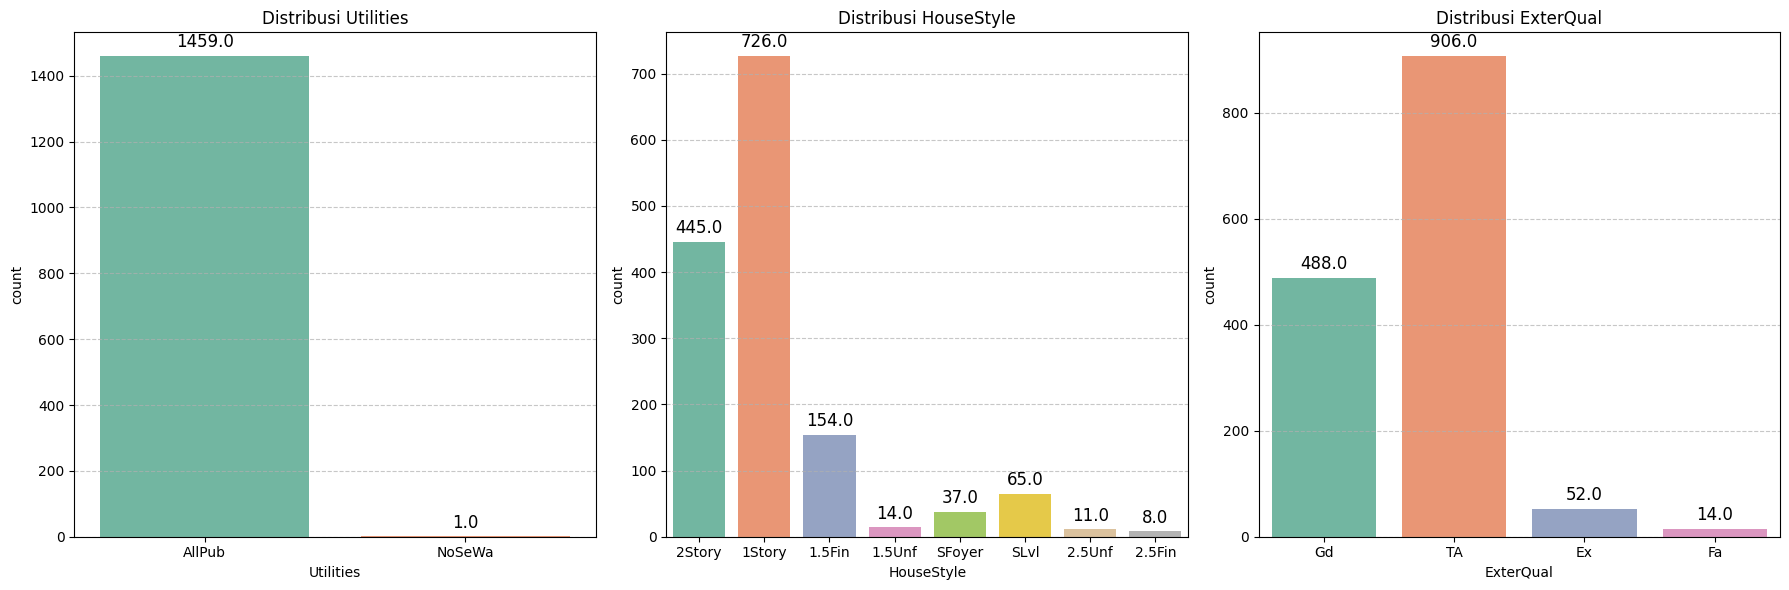

In [30]:
# Visualisasi Bar Chart untuk variabel kategorikal
plt.figure(figsize=(18, 6))

# Plot untuk 'Utilities'
plt.subplot(1, 3, 1)
ax1 = sns.countplot(data=categorical_data, x='Utilities', palette='Set2')
plt.title('Distribusi Utilities')
# Menambahkan label pada bar
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')
# Menambahkan grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot untuk 'HouseStyle'
plt.subplot(1, 3, 2)
ax2 = sns.countplot(data=categorical_data, x='HouseStyle', palette='Set2')
plt.title('Distribusi HouseStyle')
# Menambahkan label pada bar
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')
# Menambahkan grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot untuk 'ExterQual'
plt.subplot(1, 3, 3)
ax3 = sns.countplot(data=categorical_data, x='ExterQual', palette='Set2')
plt.title('Distribusi ExterQual')
# Menambahkan label pada bar
for p in ax3.patches:
    ax3.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')
# Menambahkan grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menyesuaikan layout untuk tampil lebih rapi
plt.tight_layout()
plt.show()


1. Utilities

AllPub (1459 data): Ini adalah kategori yang paling dominan, yang berarti sebagian besar rumah yang ada pada dataset ini terhubung dengan utilitas publik lengkap (seperti air, listrik, dan saluran pembuangan).

NoSeWa (1 data): Hanya ada satu rumah yang tidak memiliki utilitas publik dan mungkin menggunakan sumber daya lain seperti sumur pribadi atau sistem pengolahan limbah sendiri.

Kesimpulan: Variabel Utilities menunjukkan bahwa hampir semua rumah dalam dataset terhubung dengan utilitas publik lengkap. Data dengan nilai NoSeWa sangat jarang, yang menandakan bahwa kondisi ini lebih sebagai pengecualian daripada norma.

2. HouseStyle

2Story (445 data): Ini adalah tipe rumah yang paling banyak, menunjukkan bahwa rumah dua lantai adalah pilihan yang paling umum.

1Story (726 data): Rumah dengan satu lantai (1Story) lebih umum daripada rumah dua lantai (2Story), mengindikasikan bahwa banyak pembeli atau pemilik rumah lebih memilih rumah yang lebih sederhana atau praktis.

1.5Fin (154 data): Rumah dengan satu setengah lantai (1.5Fin) cukup banyak, yang menunjukkan adanya rumah yang setengah lantainya digunakan untuk ruang fungsional tambahan seperti ruang keluarga atau gudang.

1.5Unf (14 data): Rumah dengan lantai setengah yang tidak selesai (unf) sangat jarang ditemukan.

SFoyer (37 data): Rumah dengan gaya foyer yang terpisah (SFoyer) relatif sedikit, ini menunjukkan bahwa desain rumah dengan pintu masuk terpisah bukanlah pilihan utama.

SLvl (65 data): Rumah dengan gaya split-level cukup jarang, yang menunjukkan bahwa gaya ini kurang diminati di area yang diteliti.

2.5Unf (11 data) dan 2.5Fin (8 data): Rumah dengan dua setengah lantai sangat sedikit jumlahnya, baik yang selesai (Fin) maupun tidak selesai (Unf),
menandakan bahwa tipe rumah ini hampir tidak ada atau sangat sedikit ditemukan di dataset ini.

Kesimpulan: Variabel HouseStyle menunjukkan bahwa rumah satu lantai (1Story) dan dua lantai (2Story) adalah pilihan yang paling umum, sedangkan tipe rumah dengan setengah lantai (1.5Fin, 2.5Fin) atau split-level relatif lebih jarang.

Desain rumah yang lebih sederhana dan praktis lebih disukai, sedangkan desain dengan banyak lantai dan variasi setengah lantai kurang diminati.

3. ExterQual (Kualitas Eksterior)

Gd (Good) (488 data): Ini adalah kategori dengan kualitas eksterior yang baik dan merupakan kategori terbanyak. Kebanyakan rumah dalam dataset ini memiliki kualitas eksterior yang baik.

TA (Typical/Average) (906 data): Rumah dengan kualitas eksterior yang rata-rata atau biasa-biasa saja paling dominan, menunjukkan bahwa mayoritas rumah dalam dataset memiliki kualitas eksterior yang cukup umum atau standar.

Ex (Excellent) (52 data): Rumah dengan kualitas eksterior sangat baik cukup sedikit, hanya sebagian kecil dari dataset yang memiliki kualitas yang sangat tinggi.

Fa (Fair) (14 data): Rumah dengan kualitas eksterior yang buruk sangat sedikit ditemukan, menandakan bahwa sebagian besar rumah dalam dataset memiliki kondisi eksterior yang lebih baik dari kategori "fair".

Kesimpulan: Variabel ExterQual menunjukkan bahwa mayoritas rumah dalam dataset ini memiliki kualitas eksterior yang rata-rata hingga baik, dengan kualitas eksterior sangat baik dan buruk relatif jarang. Ini menunjukkan bahwa sebagian besar rumah dalam dataset ini memiliki kualitas eksterior yang dapat diterima dan tidak ekstrem (baik atau buruk).

Kesimpulan Umum:

Utilities menunjukkan bahwa hampir semua rumah menggunakan sistem utilitas publik yang lengkap, dengan hanya satu rumah yang berbeda.

HouseStyle mengindikasikan bahwa rumah satu lantai dan dua lantai lebih dominan, sementara desain dengan lantai setengah atau split-level lebih jarang.

ExterQual menunjukkan bahwa kualitas eksterior rumah cenderung berada dalam kondisi yang baik hingga rata-rata, dengan sedikit rumah yang memiliki kualitas luar biasa atau buruk.

5.Buatlah visualisasi histogram dan jelaskan analisis dari variabel numerikal berikut:

- SalePrice

- GrLivArea

- PoolArea

SalePrice adalah variabel target yang menunjukkan harga jual rumah.

GrLivArea memberikan informasi mengenai ukuran rumah, yang berhubungan langsung dengan harga properti.

PoolArea memberikan data tentang keberadaan dan ukuran kolam renang di rumah, yang juga dapat mempengaruhi daya tarik dan harga rumah.

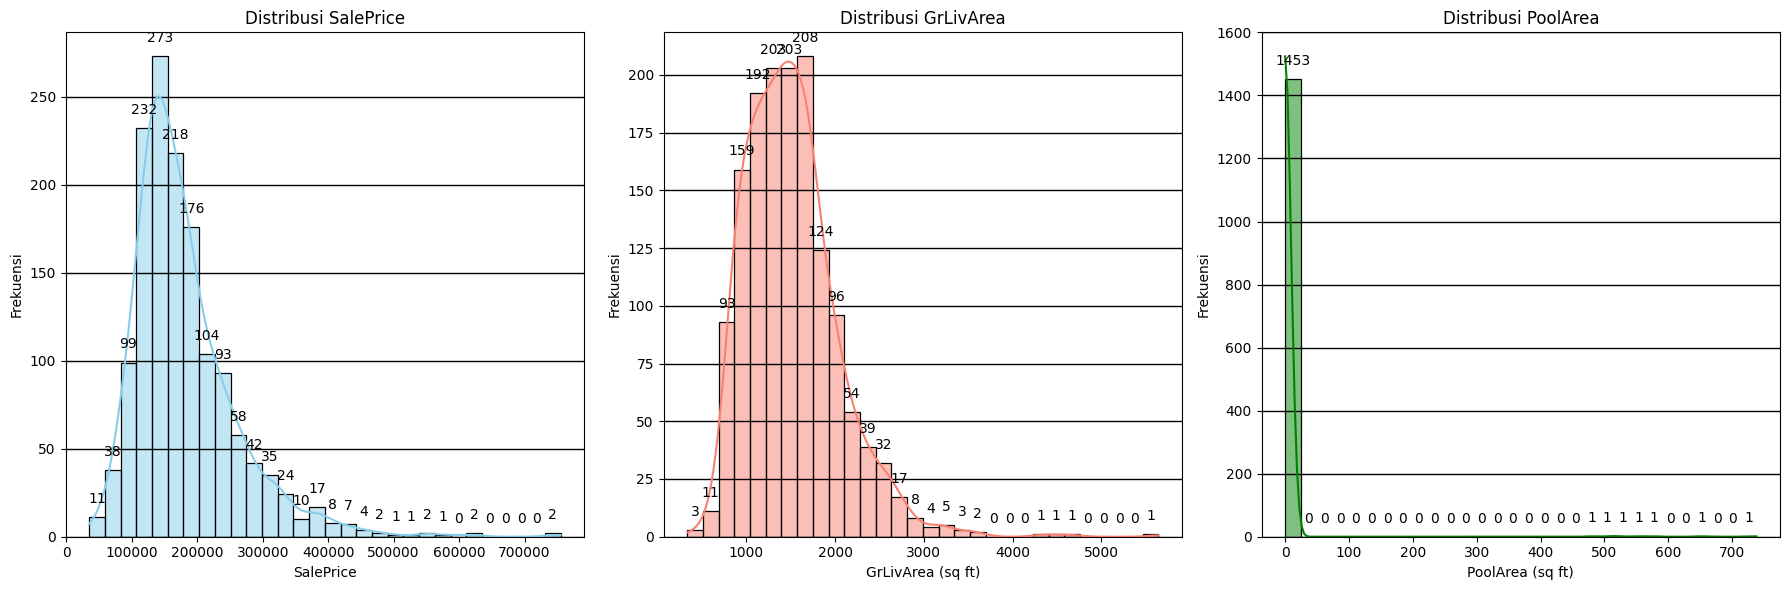

In [33]:
# Visualisasi Histogram untuk variabel numerikal
plt.figure(figsize=(18, 6))

# Plot untuk 'SalePrice'
plt.subplot(1, 3, 1)
ax1 = sns.histplot(data=house, x='SalePrice', kde=True, color='skyblue', bins=30)
plt.title('Distribusi SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frekuensi')
ax1.grid(axis='y', linestyle='-', linewidth=1, color='black')  # Grid horizontal tebal

# Menambahkan label frekuensi pada histogram 'SalePrice'
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 xytext=(0, 8), textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')

# Plot untuk 'GrLivArea'
plt.subplot(1, 3, 2)
ax2 = sns.histplot(data=house, x='GrLivArea', kde=True, color='salmon', bins=30)
plt.title('Distribusi GrLivArea')
plt.xlabel('GrLivArea (sq ft)')
plt.ylabel('Frekuensi')
ax2.grid(axis='y', linestyle='-', linewidth=1, color='black')  # Grid horizontal tebal

# Menambahkan label frekuensi pada histogram 'GrLivArea'
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 xytext=(0, 8), textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')

# Plot untuk 'PoolArea'
plt.subplot(1, 3, 3)
ax3 = sns.histplot(data=house, x='PoolArea', kde=True, color='green', bins=30)
plt.title('Distribusi PoolArea')
plt.xlabel('PoolArea (sq ft)')
plt.ylabel('Frekuensi')
ax3.grid(axis='y', linestyle='-', linewidth=1, color='black')  # Grid horizontal tebal

# Menambahkan label frekuensi pada histogram 'PoolArea'
for p in ax3.patches:
    ax3.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 xytext=(0, 8), textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')

# Menyesuaikan layout untuk tampil lebih rapi
plt.tight_layout()
plt.show()


Berdasarkan hasil analisis distribusi pada tiga variabel numerikal yang telah divisualisasikan, berikut adalah kesimpulan dan analisis dari setiap variabel:

1. SalePrice:
Analisis: Dari histogram terlihat bahwa sebagian besar data pada kolom SalePrice (harga jual rumah) menumpuk pada rentang harga 1.000.000 - 2.000.000 dengan frekuensi lebih dari 700 unit. Hal ini menunjukkan bahwa sebagian besar properti yang ada dalam dataset memiliki harga jual yang berada di rentang ini.
Kesimpulan: Properti dengan harga jual di atas 2 juta atau di bawah 1 juta cukup jarang, yang mungkin menunjukkan bahwa pasar properti di wilayah ini cenderung lebih terfokus pada harga rumah menengah. Bisa jadi juga ini mencerminkan kebiasaan pasar properti di wilayah tersebut yang lebih terjangkau dan lebih banyak diakses oleh pembeli dengan rentang harga di sekitar angka ini.
2. GrLivArea:
Analisis: Pada kolom GrLivArea (luas area rumah), terlihat bahwa data berkumpul di rentang luas 1000 - 3000 sq ft dengan frekuensi yang cukup tinggi. Artinya, sebagian besar rumah yang ada dalam dataset ini memiliki luas yang lebih besar di sekitar 1000 - 3000 sq ft, yang bisa mengindikasikan bahwa properti yang lebih besar lebih umum dan lebih banyak tersedia.
Kesimpulan: Properti dengan luas di bawah 1000 sq ft atau lebih dari 3000 sq ft jauh lebih sedikit. Hal ini bisa mencerminkan jenis properti yang lebih banyak dicari di pasar tersebut, yaitu rumah dengan ukuran menengah yang cenderung lebih terjangkau atau lebih populer di kalangan pembeli.
3. PoolArea:
Analisis: Kolom PoolArea (luas kolam renang) menunjukkan bahwa mayoritas data terpusat di rentang 1453 sq ft dengan beberapa nilai lainnya memiliki frekuensi 1 di rentang 500 - 700 sq ft. Ini menunjukkan bahwa sebagian besar rumah dalam dataset ini memiliki kolam renang yang berukuran cukup besar, yaitu sekitar 1453 sq ft.
Kesimpulan: Adanya frekuensi rendah di rentang lain (seperti 500-700 sq ft) menunjukkan bahwa meskipun kolam renang berukuran besar relatif umum di dalam dataset ini, properti dengan kolam yang lebih kecil atau tanpa kolam renang sangat jarang atau mungkin tidak ada sama sekali. Hal ini dapat mengindikasikan bahwa kolam renang adalah fitur penting di banyak properti dalam pasar ini, mungkin sebagai daya tarik tambahan bagi pembeli.
Kesimpulan Umum:
Dari ketiga variabel yang dianalisis, dapat disimpulkan bahwa pasar properti yang dianalisis lebih condong ke properti dengan harga menengah, ukuran rumah yang lebih besar (1000-3000 sq ft), dan fitur tambahan berupa kolam renang yang cukup besar. Properti dengan harga sangat rendah atau tinggi serta dengan ukuran lebih kecil atau tanpa kolam renang relatif jarang.

Hal ini dapat memberikan informasi berharga bagi pihak pengembang properti atau agen real estate untuk menyesuaikan penawaran mereka dengan tren pasar yang lebih umum di wilayah ini.








6.Lakukan pemrosesan data dengan transformasi log-10 untuk masing-masing variabel numerikal. Jangan lupa tulis analisis yang kamu dapatkan, ya!

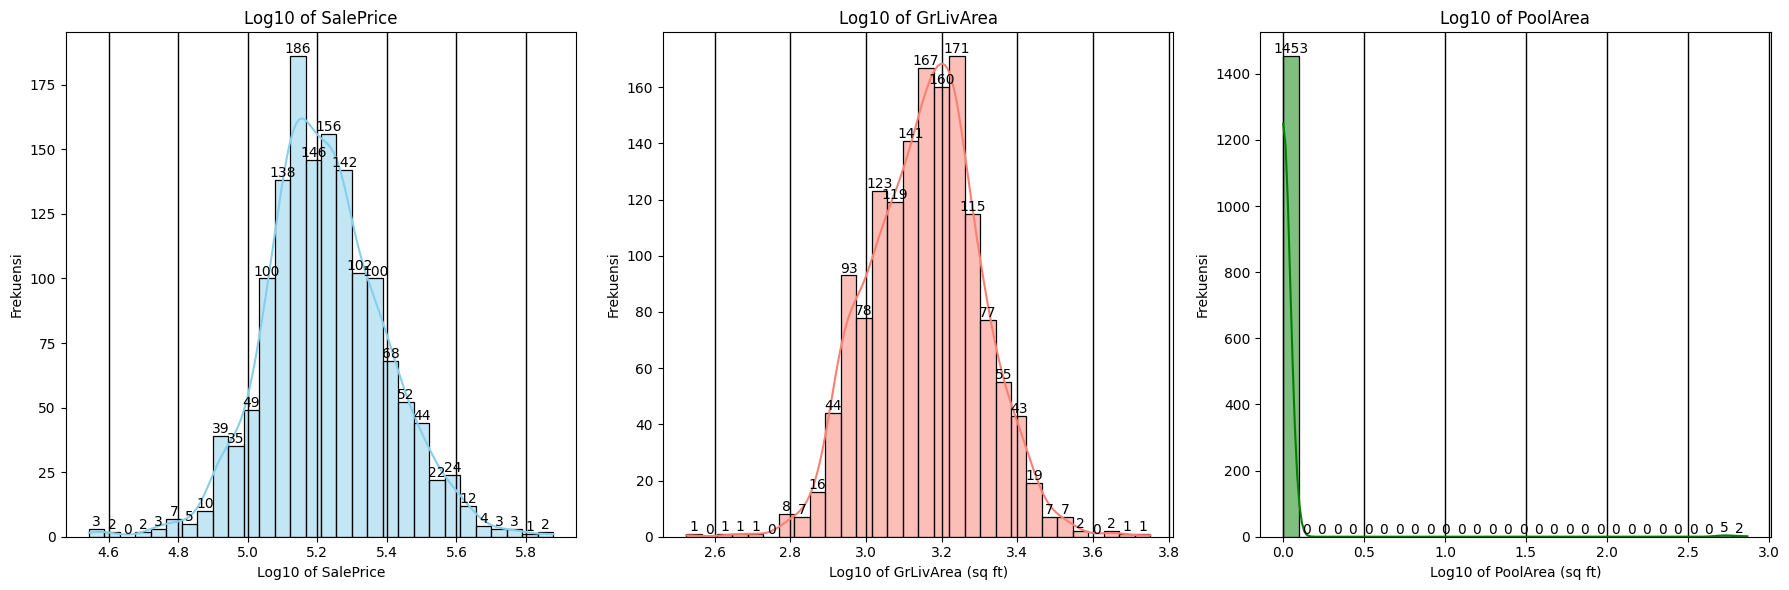

In [36]:
# Visualisasi histogram untuk hasil transformasi dengan label frekuensi
plt.figure(figsize=(18, 6))

# Plot untuk 'Log_SalePrice'
plt.subplot(1, 3, 1)
ax1 = sns.histplot(data=house, x='Log_SalePrice', kde=True, color='skyblue', bins=30)
plt.title('Log10 of SalePrice')
plt.xlabel('Log10 of SalePrice')
plt.ylabel('Frekuensi')
plt.grid(axis='x', linestyle='-', linewidth=1, color='black')  # Grid horizontal tebal

# Menambahkan label frekuensi untuk 'Log_SalePrice'
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 fontsize=10, color='black',
                 xytext=(0, 5), textcoords='offset points')

# Plot untuk 'Log_GrLivArea'
plt.subplot(1, 3, 2)
ax2 = sns.histplot(data=house, x='Log_GrLivArea', kde=True, color='salmon', bins=30)
plt.title('Log10 of GrLivArea')
plt.xlabel('Log10 of GrLivArea (sq ft)')
plt.ylabel('Frekuensi')
plt.grid(axis='x', linestyle='-', linewidth=1, color='black')  # Grid horizontal tebal

# Menambahkan label frekuensi untuk 'Log_GrLivArea'
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 fontsize=10, color='black',
                 xytext=(0, 5), textcoords='offset points')

# Plot untuk 'Log_PoolArea'
plt.subplot(1, 3, 3)
ax3 = sns.histplot(data=house, x='Log_PoolArea', kde=True, color='green', bins=30)
plt.title('Log10 of PoolArea')
plt.xlabel('Log10 of PoolArea (sq ft)')
plt.ylabel('Frekuensi')
plt.grid(axis='x', linestyle='-', linewidth=1, color='black')  # Grid horizontal tebal

# Menambahkan label frekuensi untuk 'Log_PoolArea'
for p in ax3.patches:
    ax3.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 fontsize=10, color='black',
                 xytext=(0, 5), textcoords='offset points')

# Menyesuaikan layout untuk tampil lebih rapi
plt.tight_layout()
plt.show()


1. SalePrice (Log10)

Titik tertinggi frekuensi: Rentang 5.0 - 5.2 dengan frekuensi tertinggi 186.

Analisis:
Setelah transformasi log, distribusi SalePrice menunjukkan bahwa sebagian besar rumah memiliki harga yang lebih rendah (log10 harga yang lebih kecil). Hal ini menggambarkan bahwa harga rumah yang lebih tinggi cenderung lebih sedikit, dan harga rumah dengan nilai lebih rendah lebih banyak terjadi.
Frekuensi tertinggi berada pada rentang log10 harga 5.0 - 5.2, yang artinya sebagian besar rumah memiliki harga sekitar 100.000 hingga 200.000 USD (karena log10 100.000 adalah 5.0 dan log10 200.000 adalah 5.3).

2. GrLivArea (Log10)
Titik tertinggi frekuensi: Rentang 2.8 - 3.4 dengan frekuensi tertinggi 171.

Analisis:
Transformasi log10 menunjukkan bahwa sebagian besar rumah memiliki luas ruang lantai (GrLivArea) yang lebih besar, dengan nilai frekuensi tertinggi pada rentang log10 antara 2.8 hingga 3.4 (sekitar 600 hingga 2500 kaki persegi).
Ini menunjukkan bahwa sebagian besar rumah yang ada di dataset ini memiliki luas ruang lantai yang cukup luas, antara 600 hingga 2500 kaki persegi, yang merupakan kisaran ukuran yang cukup umum.

3. PoolArea (Log10)
Titik tertinggi frekuensi: Rentang 0.0, dengan frekuensi tertinggi 1453.

Analisis:
Data PoolArea menunjukkan frekuensi yang sangat tinggi pada rentang 0.0, yang mengindikasikan bahwa hampir semua rumah dalam dataset ini tidak memiliki kolam renang (nilai PoolArea hampir 0).
Frekuensi tertinggi berada pada rentang log10 0.0, yang berarti hampir seluruh rumah dalam dataset tidak memiliki kolam renang, atau hanya memiliki area kolam yang sangat kecil (dekat dengan nol).

Kesimpulan Umum:
SalePrice menunjukkan bahwa sebagian besar rumah memiliki harga yang lebih rendah dengan harga rumah yang lebih tinggi relatif lebih jarang.
GrLivArea menunjukkan bahwa rumah-rumah yang ada cenderung memiliki ukuran ruang lantai yang lebih luas, dengan frekuensi tertinggi pada rentang ukuran yang cukup besar.

PoolArea menunjukkan bahwa sebagian besar rumah tidak memiliki kolam renang, dan hanya sedikit rumah yang memiliki kolam renang dengan ukuran yang signifikan.

Transformasi log10 membantu dalam mengurangi skewness (kemencengan) pada data yang sangat bernilai besar, seperti harga dan luas rumah, sehingga mempermudah pemodelan dan analisis lebih lanjut.

Tahap 3: 2D Visualization
7. Buatlah visualisasi hubungan antara dataset:

GrLivArea dengan SalePrice

GarageArea dengan SalePrice

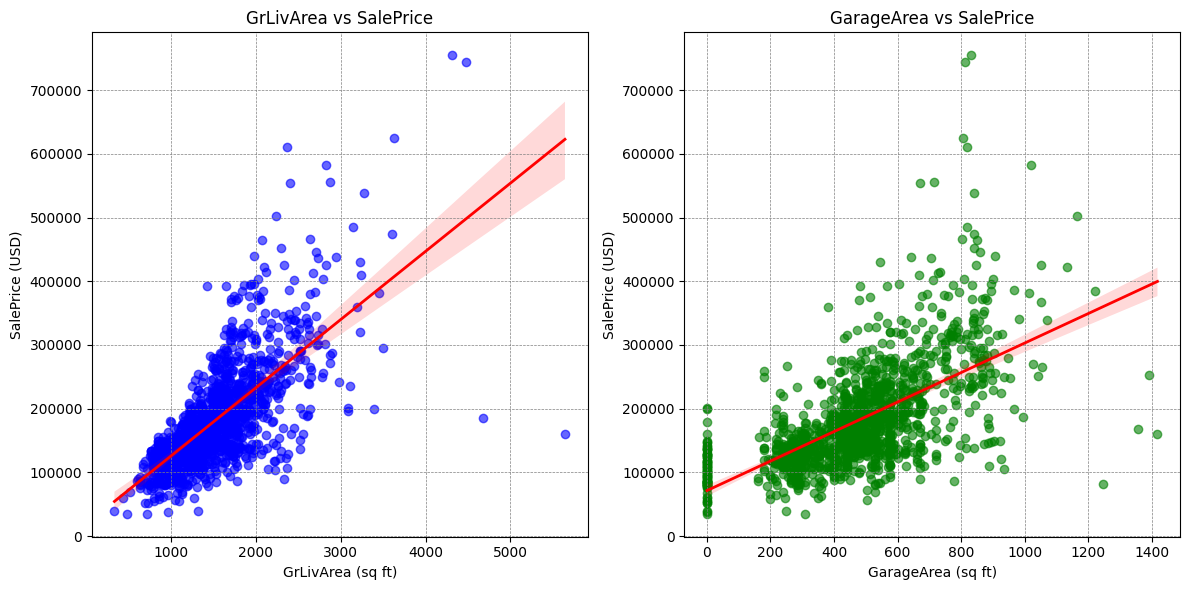

In [38]:
# Visualisasi Scatter Plot untuk hubungan GrLivArea dengan SalePrice
plt.figure(figsize=(12, 6))

# Plot untuk 'GrLivArea vs SalePrice' dengan garis linear
plt.subplot(1, 2, 1)
sns.regplot(data=house, x='GrLivArea', y='SalePrice', scatter_kws={'color': 'blue', 'alpha': 0.6}, line_kws={'color': 'red', 'linewidth': 2})
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea (sq ft)')
plt.ylabel('SalePrice (USD)')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, color='gray')

# Plot untuk 'GarageArea vs SalePrice' dengan garis linear
plt.subplot(1, 2, 2)
sns.regplot(data=house, x='GarageArea', y='SalePrice', scatter_kws={'color': 'green', 'alpha': 0.6}, line_kws={'color': 'red', 'linewidth': 2})
plt.title('GarageArea vs SalePrice')
plt.xlabel('GarageArea (sq ft)')
plt.ylabel('SalePrice (USD)')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, color='gray')

# Menyesuaikan layout untuk tampil lebih rapi
plt.tight_layout()
plt.show()


GrLivArea vs SalePrice:

Hubungan Linear Positif: Garis linear yang naik dari kiri bawah ke kanan atas menunjukkan bahwa ada hubungan positif antara GrLivArea (Luas Area Tinggal) dan SalePrice (Harga Penjualan). Artinya, semakin besar ukuran rumah (GrLivArea), semakin tinggi harga rumah tersebut. Ini masuk akal karena rumah dengan ruang yang lebih luas biasanya dihargai lebih tinggi di pasar.

Titik Awal Garis Tidak Di Nol: Meskipun garis regresi mulai dari kiri bawah dan naik, garis tersebut tidak dimulai dari titik nol. Ini menunjukkan bahwa untuk rumah dengan luas yang sangat kecil (dekat dengan 0), harga penjualannya tidak langsung nol. Bahkan rumah kecil pun mungkin memiliki harga dasar tertentu, seperti biaya tanah atau bangunan minimum.
GarageArea vs SalePrice:

Hubungan Linear Positif: Seperti hubungan pertama, garis regresi menunjukkan hubungan positif antara GarageArea dan SalePrice. Semakin besar area garasi, semakin tinggi harga jual rumah. Ini logis karena garasi yang lebih besar bisa menambah nilai rumah, terutama di area dengan kebutuhan untuk ruang parkir atau penyimpanan lebih.

Titik Awal Garis Tidak Di Nol: Sama seperti hubungan antara GrLivArea dan SalePrice, garis regresi untuk GarageArea juga tidak dimulai dari titik nol. Hal ini menunjukkan bahwa meskipun rumah dengan area garasi yang sangat kecil mungkin tetap ada, harga jualnya tidak akan langsung nol. Ada kemungkinan harga dasar untuk rumah tanpa garasi atau dengan area garasi minimal.

Alasan Mengapa Garis Tidak Dimulai dari Nol:
Tidak Semua Rumah Memiliki Luas Garasi atau Luas Area Tinggal yang Sangat Kecil: Tidak semua rumah memiliki garasi kecil atau tidak ada garasi sama sekali. Dalam hal ini, regresi linear mencoba untuk menyesuaikan hubungan antara kedua variabel dengan mempertimbangkan nilai data yang ada, dan mungkin saja ada batasan bawah untuk harga atau ukuran garasi yang akan membuat harga tetap lebih tinggi meskipun ada sedikit atau bahkan tidak ada area garasi.
Harga Dasar: Seperti yang dijelaskan sebelumnya, meskipun rumah tidak memiliki banyak area tambahan seperti garasi atau ruang tinggal besar, rumah tersebut tetap memiliki nilai dasar, yang mencakup faktor-faktor lain seperti lokasi, tanah, dan kondisi bangunan yang dapat mempengaruhi harga.

Kesimpulan:
GrLivArea dan GarageArea: Kedua variabel ini menunjukkan hubungan linear positif yang sangat wajar dengan harga jual rumah. Semakin besar ruang (baik di dalam rumah maupun garasi), semakin tinggi harga rumah.

Tidak Dimulai dari Nol: Garis regresi untuk kedua plot tidak dimulai dari nol, menunjukkan bahwa meskipun ada faktor ruang yang sangat kecil, harga rumah tetap memiliki nilai dasar. Hal ini bisa dipengaruhi oleh kondisi pasar, lokasi rumah, atau faktor lainnya yang menentukan harga dasar sebuah properti.

Dengan menggunakan informasi ini, Anda bisa lebih memahami bagaimana faktor-faktor seperti luas rumah dan luas garasi dapat mempengaruhi harga jual rumah dalam dataset ini.